In [ ]:
zip_path = '/content/drive/My\ Drive/Dataset/Santa_image/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

!rm /content/santa-dataset.zip

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='glorot_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = RMSprop(lr=0.001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0

In [ ]:
dataset_dir = '/content/santa-dataset'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rescale=1.0/255.0)
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
history_model_tunning = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=100)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
6/6 [==============================] - 18s 3s/step - loss: 1.7986 - accuracy: 0.5106 - val_loss: 0.7119 - val_accuracy: 0.5000
Epoch 2/100
6/6 [==============================] - 16s 3s/step - loss: 0.6724 - accuracy: 0.5906 - val_loss: 0.6026 - val_accuracy: 0.5962
Epoch 3/100
6/6 [==============================] - 16s 3s/step - loss: 0.7662 - accuracy: 0.6148 - val_loss: 0.6313 - val_accuracy: 0.6923
Epoch 4/100
6/6 [==============================] - 18s 3s/step - loss: 0.6055 - accuracy: 0.6692 - val_loss: 0.5245 - val_accuracy: 0.8462
Epoch 5/100
6/6 [==============================] - 15s 3s/step - loss: 0.4934 - accuracy: 0.8263 - val_loss: 0.5066 - val_accuracy: 0.8077
Epoch 6/100
6/6 [==============================] - 15s 3s/step - loss: 0.5095 - accuracy: 0.8051 - val_loss: 0.4463 - val_accuracy: 0.8846
Epoch 7/100
6/6 [==============================] - 18s 3s/step - loss: 0.5455 - accuracy: 

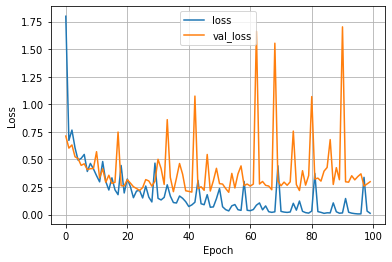

In [ ]:
plot_loss(history_model_tunning)

In [ ]:
loss, accuracy = model.evaluate(test_iterator, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

3/3 - 2s - loss: 0.2979 - accuracy: 0.9385
Test accuracy: 0.9384615421295166
Test loss: 0.2978581488132477
